<a href="https://colab.research.google.com/github/SewoongPark/SeSac_study_repo/blob/main/Pytorch_study_00ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TIL**
### **Tensorflow와 pytorch**
> * keras와 pytorch는 tensor를 기반으로 작동하는 framework입니다.
> Tensor기반의 keras를 쓸지, <br>그냥 keras를 쓸지, pyrotch를 쓸지에 대한 선택을 할 수 있습니다.

### Point cloud 살펴보기
### 3D Mesh
 > 뇌 사진을 찍으면 3d 모델링으로 변환해줌 ex) nii



### **Pytorch 실습**
> 공식 document를 참조해서 공부하는 것을 습관화하자<br>예) torch.nn.flatten() 검색하고 공부

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor



In [3]:
vector = torch.tensor([1, 2, 3, 4])
print(type(vector)), print(vector[0])
vector[0] = 100
vector

<class 'torch.Tensor'>
tensor(1)


tensor([100,   2,   3,   4])

### Tensorflow와의 비교

In [13]:
import tensorflow as tf

vector = tf.constant([1, 2, 3, 400], dtype = tf.unit8)
print(type(vector))
#  vector[0] = 100 // TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment
tensor = tf.Variable(vector)
tensor[0].assign(100)
tensor

AttributeError: module 'tensorflow' has no attribute 'unit8'

### **torch에서 device 확인**

In [4]:
def get_torch_device():
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  return device
get_torch_device()

device(type='cpu')

In [30]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose( # transforms가 제공하는 Compose 기능(2개 이상의 작업 수행)
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 표준과 평균이 0.5인 범위에서 데이터 받아보기

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform)

# num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [16]:
len(trainset), len(trainset[0]), len(trainset[0][0]), trainset[0][0]

(50000,
 2,
 3,
 tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-

### **parameters:**
  > * `root(string)`: 데이터셋의 루트 경로입니다. 여기에는 `leftimg8bit` 및 `gtFine` 또는 `gtCoarse` 디렉토리가 있어야 합니다.
  > * `split(string,)`: 사용할 이미지 분할입니다. mode="fine"이면 `train`, `test` 또는 `val` 입니다. 그렇지 않으면 `train`, `train_extra` 또는 `val`입니다.
  > * `mode (문자열, 선택 사항)` - 사용할 품질 모드입니다. `fine` 또는 `coarse`입니다.
  > * `target_type (문자열 또는 목록, 선택 사항)` - 사용할 대상 유형입니다.`instance`, `semantic`, `polygon` 또는 `color`가 될 수 있습니다. 모든 지정된 대상 유형의 튜플을 출력하려면 목록으로 지정할 수도 있습니다.
  > * `transform (호출 가능 객체, 선택 사항)` - PIL 이미지를 입력으로 받아 변환된 버전을 반환하는 함수/변환입니다. 예: `transforms.RandomCrop`
  > * `target_transform (호출 가능 객체, 선택 사항)` - 대상을 입력으로 받아 변환된 버전을 반환하는 함수/변환입니다.
  > * `transforms (호출 가능 객체, 선택 사항)` - 입력 샘플과 대상을 입력으로 받아 변환된 버전을 반환하는 함수/변환입니다.

  


In [ ]:
torchvision.datasets.CIFAR10(root: str,
                             train: bool = True,
                             transform: Union[Callable, NoneType] = None,
                             target_transform: Union[Callable, NoneType] = None,
                             download: bool = False) → None

pytorch와 plot이 충돌하는 문제 발생

In [29]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 출처: https://life-is-potatoo.tistory.com/100 [삶은 감자:티스토리]

imagedataset이 잘 출력되는지 확인

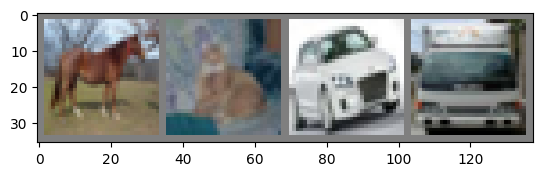

horse cat   car   truck


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [32]:
print(trainset)
print("-" * 100)
print(testset)
print("-" * 100)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
----------------------------------------------------------------------------------------------------
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
----------------------------------------------------------------------------------------------------


**Batch size**
> 1번 배치사이즈 자료 확인

> 2개: 이미지 + 라벨

> 0번 자료는 이미지: (32*32*3) 4개(batch가 4개이므로)

> 1번 자료에는 라벨 4개

In [34]:
first_batch = trainloader.__iter__().__next__()
len(first_batch), first_batch[0].shape, first_batch[1].shape

(2, torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [39]:
print(np.shape(first_batch[0][0])) # -> (32, 32, 3)으로 변환해주어야 함
print(np.shape(np.transpose(first_batch[0][0], (1, 2, 0))))

torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


IndexError: index 4 is out of bounds for dimension 0 with size 4

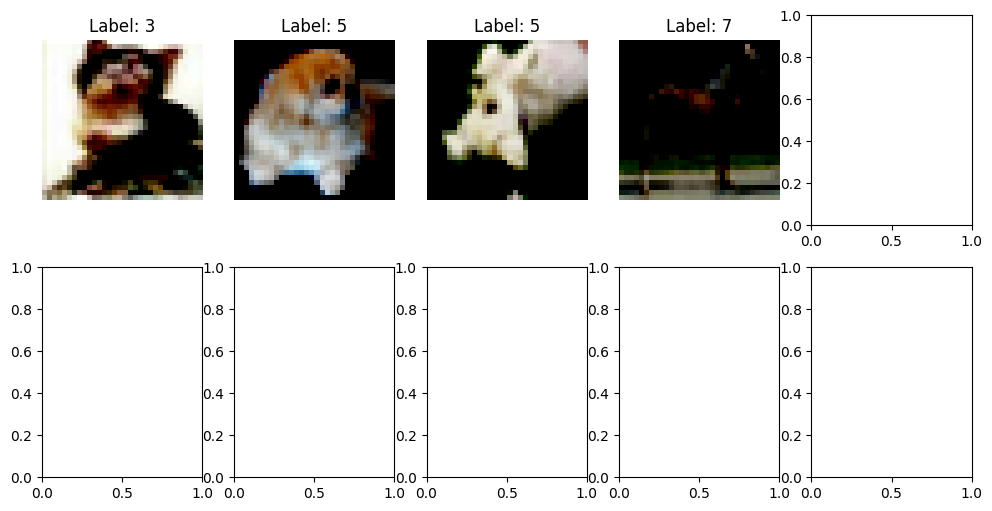

In [35]:
import matplotlib.pyplot as plt

# 데이터와 레이블 추출
images, labels = first_batch

# 이미지와 레이블 시각화
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # 이미지 출력
    ax.imshow(images[i].permute(1, 2, 0))  # 이미지 차원 순서 변경
    ax.axis('off')  # 축 제거
    ax.set_title(f'Label: {labels[i]}')  # 레이블 추가

plt.tight_layout()
plt.show()

### **CONV 2D**

In [ ]:
torch.nn.Conv2d(in_channels,
                out_channels,
                kernel_size,
                stride=1,
                padding=0,
                dilation=1,
                groups=1,
                bias=True,
                padding_mode='zeros',
                device=None,
                dtype=None)


In [40]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__() ### [작업 순서 1번]
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) # kernel: 2, stride: 2
        self.conv2 = nn.Conv2d(6, 16, 5) # [{(5 * 5) * 6} + 1] * 16 = [작업순서 4번에 사용]
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84) # fc1에서의 output size에 의해 120으로 출력
        self.fc3 = nn.Linear(84, 10) # 마지막 output은 class 개수와 일치해야 함

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) ### [작업 순서 2번] in: 3, out: 6인 (5*5) kernel
                                              ### channel이 3개이므로 {(25 * 3) + 1(bias)} * 6
        x = self.pool(F.relu(self.conv2(x))) ### [작업 순서 3번] 2번에서 받은 결과물 6채널, (28 * 28)인 자료를 relu 함수로 계산, pooling
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [41]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [43]:
import torchsummary
torchsummary.summary(net,(3,32,32))
# 32행 32열, 3채널의 input image(channel이 바뀔 시 error, vaild할 시 shape이 줄어들기 때문에 flatten에서 size miss)
  # [{32 - kernel_size + (2 * padding_size)} / stride] + 1

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [47]:
x = torch.randn(4, 4)
x.view(8, 2) # reshape, flatten과 동일한 기능

tensor([[-1.3618,  1.6340],
        [-1.9247, -1.4289],
        [-0.7889,  1.3884],
        [-1.6892, -0.8744],
        [-1.4590, -2.7946],
        [-0.0579,  1.7650],
        [ 0.0426,  0.5354],
        [-0.2860, -0.1941]])

In [56]:
imgArray = first_batch[0][0]
print(np.shape(net.conv1(imgArray))) #convolution layer만 거침, Conv2d-1, [-1, 6, 28, 28], 456
print(np.shape(net.pool(imgArray))) #maxpooling layer만 거침

torch.Size([6, 28, 28])
torch.Size([3, 16, 16])


In [57]:
np.shape(net.pool(net.conv1(imgArray))) #MaxPool2d-2, [-1, 6, 14, 14], 0

torch.Size([6, 14, 14])

In [59]:
np.shape(net.conv2(net.pool(net.conv1(imgArray)))) #  Conv2d-3, [-1, 16, 10, 10], 2,416

torch.Size([16, 10, 10])

In [60]:
np.shape(net.pool(net.conv2(net.pool(net.conv1(imgArray))))) #  MaxPool2d-4, [-1, 16, 5, 5], 0

torch.Size([16, 5, 5])

In [61]:
net.named_parameters()

<generator object Module.named_parameters at 0x7d96fa07f140>

In [ ]:
for name, param in net.named_parameters():
    if param.requires_grad: # data가 있다면 기울기 계산(gradient)
      print(name, param.data) # 경사하강법에서 매개 변수를 업데이트하는데 사용되는 값, 매개변수를 어느 방향으로 조정해야하는지 나타냄

### layer 출력물과 weight값 반응도 map 시각화
> 전이학습에서의 레이어 동결을 위해 샘플 데이터에 대한 레이어 출력물을 시각화하기 위한 용도로 사용할 수 있습니다.

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


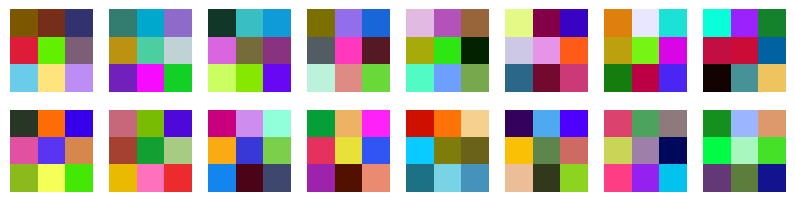

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # 16x16은 이미지 크기가 절반으로 감소했기 때문입니다.
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스로 출력합니다.

    def forward(self, x):
        # Convolutional layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        # Flatten
        x = x.view(-1, 32 * 16 * 16)
        # Fully connected layers
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 생성
model = SimpleCNN()

# 모델 출력
print(model)



# 모델의 첫 번째 합성곱 층의 가중치 가져오기
first_conv_layer = model.conv1
filters = first_conv_layer.weight.data  # 가중치 데이터 가져오기

# 필터들을 그리드로 표시
plt.figure(figsize=(10, 5))
num_filters = filters.size(0)
for i in range(num_filters):
    filter_img = filters[i].detach().numpy().squeeze()
    filter_img_min = np.min(filter_img)
    filter_img_max = np.max(filter_img)
    filter_img = (filter_img - filter_img_min) / (filter_img_max - filter_img_min)  # 정규화
    plt.subplot(4, 8, i + 1)
    plt.imshow(filter_img, cmap='gray')  # 필터 시각화
    plt.axis('off')
plt.show()


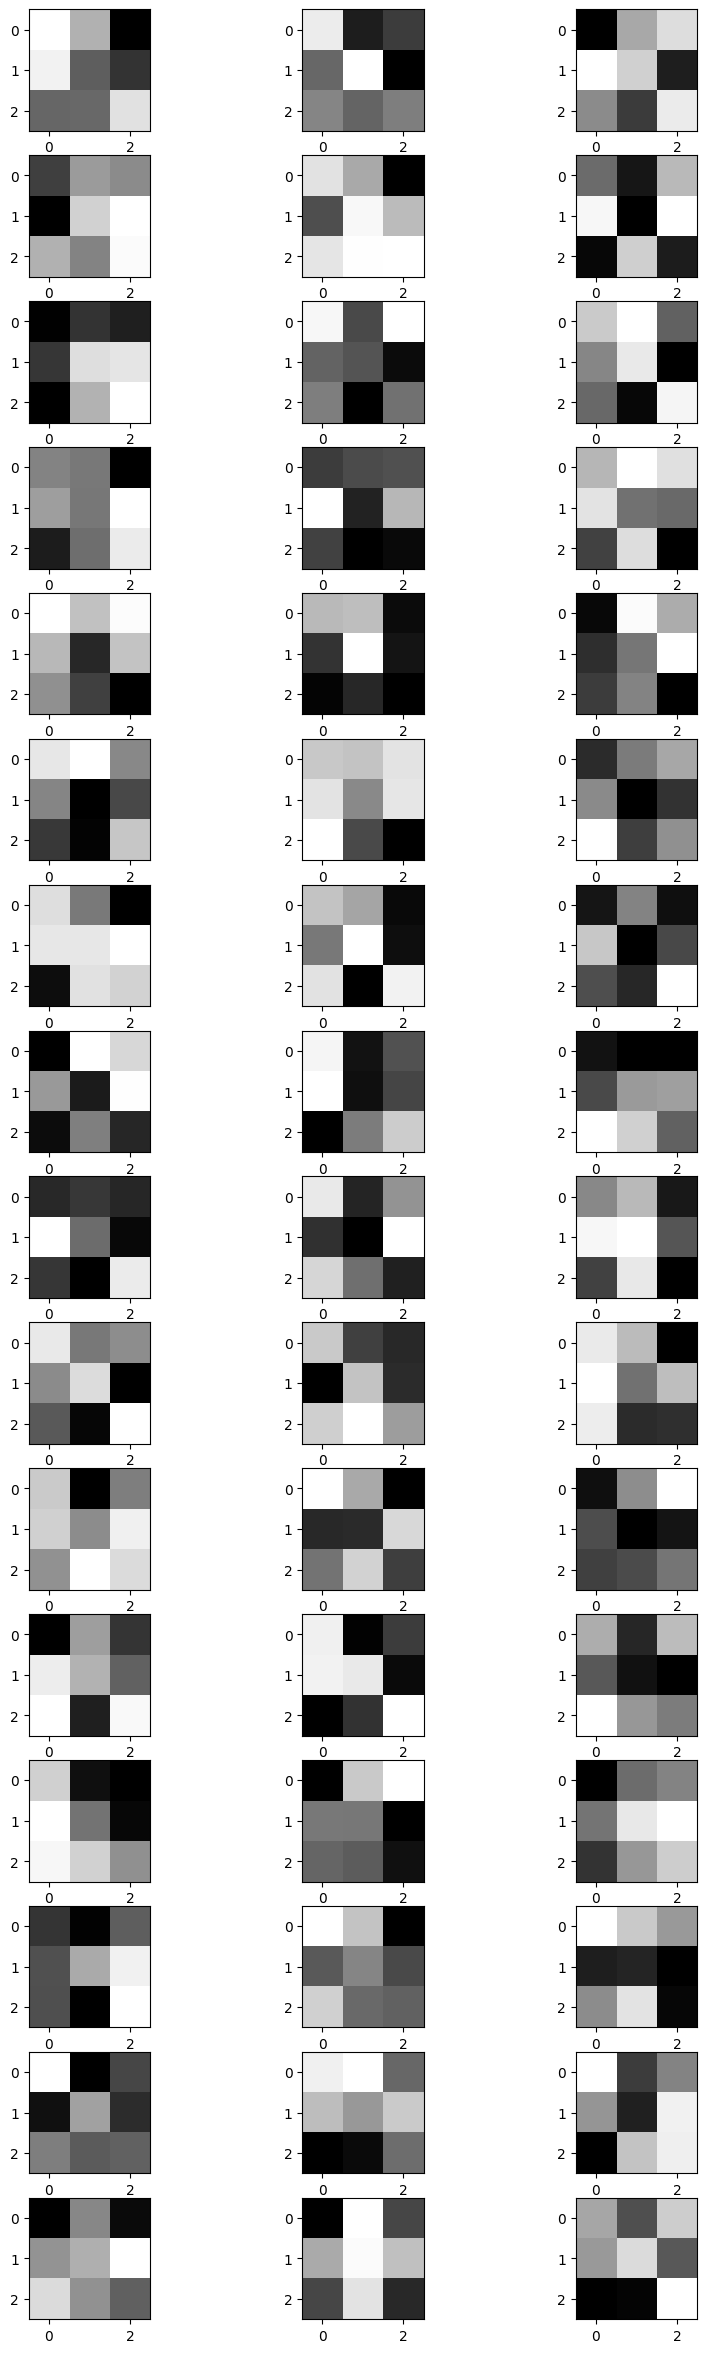

In [70]:
filters = model.conv1.weight.data
fig, axs = plt.subplots(filters.size(0),3 , figsize = (10, 30)) # 3인 이유는 channel이 3개이기 때문

for i in range(filters.size(0)):
  filter_data = filters[i].detach().numpy()
  axs[i,0].imshow(filter_data[0], cmap="gray") #반응의 여부만 확인하면 되기 때문에 흑백으로 검수, 흰색에 가까울수록 반응도가 좋다
  axs[i,1].imshow(filter_data[1], cmap="gray")
  axs[i,2].imshow(filter_data[2], cmap="gray")

### Histogram 추가
> 가중치의 분포를 히스토그램으로 시각화하여 가중치 값의 분포를 확인할 수 있습니다. 네트워크의 가중치가 적절한 범위에 있는지, 균일한 분포를 가지는지 확인할 수 있습니다.

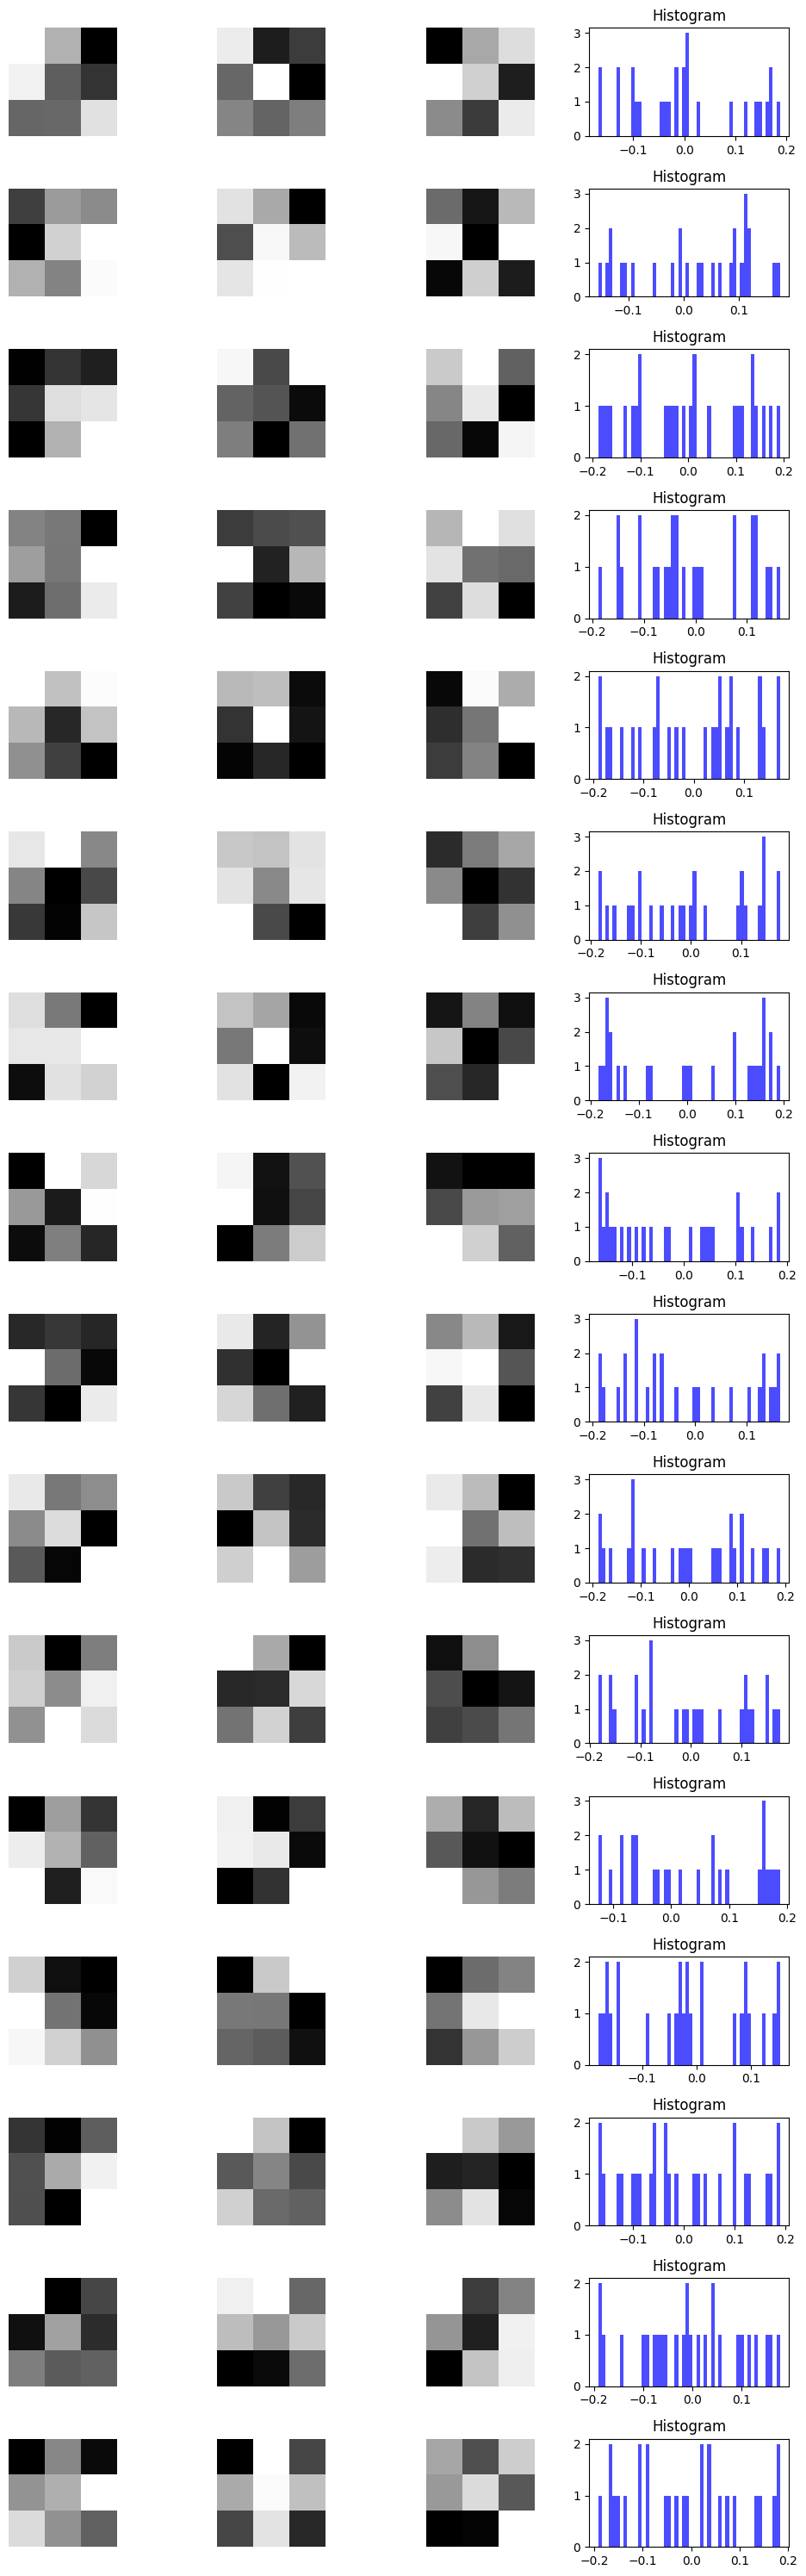

In [72]:
import matplotlib.pyplot as plt

filters = model.conv1.weight.data
fig, axs = plt.subplots(filters.size(0), 4, figsize=(10, 30))  # 3개의 채널과 히스토그램을 함께 표시하기 위해 열의 수를 4로 지정

for i in range(filters.size(0)):
    filter_data = filters[i].detach().numpy()

    # 필터 시각화
    for j in range(3):
        axs[i, j].imshow(filter_data[j], cmap='gray')
        axs[i, j].axis('off')

    # 가중치 분포 시각화 (히스토그램)
    axs[i, 3].hist(filter_data.flatten(), bins=50, color='blue', alpha=0.7)
    axs[i, 3].set_title('Histogram')

plt.tight_layout()
plt.show()


TypeError: Invalid shape (1, 3, 32, 32) for image data

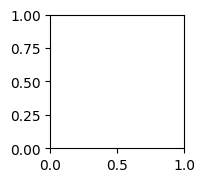

In [74]:
import matplotlib.pyplot as plt

# unsqueeze를 추가하여 이미지의 채널 차원을 추가
images, labels = first_batch
images = images.unsqueeze(1)  # 이미지의 채널 차원을 추가 (배치 크기, 채널 수, 높이, 너비)

# 이미지를 그리드로 표시
plt.figure(figsize=(10, 4))
for i in range(min(10, len(images))):  # 최대 10개까지만 표시
    plt.subplot(2, 5, i + 1)
    image = images[i].numpy()  # 채널 차원 제거
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.show()


Define a Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer
> Let’s use a Classification Cross-Entropy loss and SGD with momentum.

Optimizer: $Cross entropy$공식

> Class indices in the range
[
$0
,
C
$)
[$0,C$) where
$C$ is the number of classes; if ignore_index is specified, this loss also accepts this class index (this index may not necessarily be in the class range). The unreduced (i.e. with reduction set to 'none') loss for this case can be described as:

$$L(x,y) = [l₁, ..., lₙ]ᵀ, lₙ = -w_{yₙ} log(Σᵢ₌₁ᶜ exp(x_{n,c}) / exp(x_{n,yₙ})) ⋅ 1{yₙ ≠ ignore_index}$$

In [75]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # 3개 이상의 y결과(class, label)은 softmax
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [76]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # BATCH SIZE만큼 돌리고 LEARNING RATE 값을 재조정합니다.
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.231
[1,  4000] loss: 1.920
[1,  6000] loss: 1.693
[1,  8000] loss: 1.597
[1, 10000] loss: 1.526
[1, 12000] loss: 1.437
[2,  2000] loss: 1.353
[2,  4000] loss: 1.365
[2,  6000] loss: 1.335
[2,  8000] loss: 1.292
[2, 10000] loss: 1.267
[2, 12000] loss: 1.261
Finished Training


In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# 데이터셋 정의
x = torch.tensor([[1, 2, 3], [1, 2, 4], [2, 4, 4], [3, 4, 1]], dtype=torch.float32)
y = torch.tensor([1, 4, 1, 2], dtype=torch.long)
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 모델 정의
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(3, 5)  # 입력 크기: 3, 출력 크기: 카테고리(클래스)에서 가장 큰 값 + 1

    def forward(self, x):
        return self.fc(x)

model = MyModel()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 텐서보드 로거 정의
writer = SummaryWriter()

# 훈련 반복
epochs = 3

for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in dataloader:  # DataLoader에서 바로 데이터 가져오기
        # 경사 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # 에포크마다 손실 출력 및 모델 저장
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss}")
    torch.save(model.state_dict(), f"model_epoch_{epoch+1}.pt")

    # 텐서보드에 손실 기록
    writer.add_scalar('Loss/train', running_loss, epoch+1)

# 텐서보드에 모델 시각화
dataiter = iter(dataloader)
images, labels = next(dataiter)  # 한 배치의 데이터 가져오기
writer.add_graph(model, images)

# 텐서보드 종료
writer.close()


Epoch [1/3], Loss: 4.3119707107543945
Epoch [2/3], Loss: 4.000985205173492
Epoch [3/3], Loss: 3.7029263973236084
